Random valid pattern: [7, 3, 2, 4, 6]


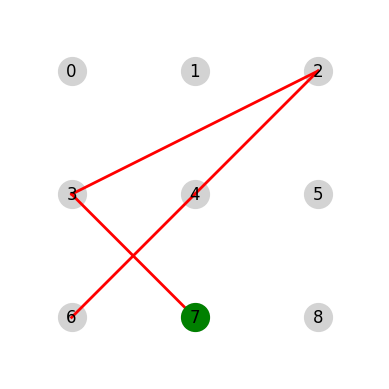

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

jumps = {
    (0, 2): 1, (2, 0): 1, (0, 6): 3, (6, 0): 3,
    (2, 8): 5, (8, 2): 5, (6, 8): 7, (8, 6): 7,
    (0, 8): 4, (8, 0): 4, (2, 6): 4, (6, 2): 4,
    (1, 7): 4, (7, 1): 4, (3, 5): 4, (5, 3): 4,
}

def is_valid_move(a, b, used):
    if b in used:
        return False
    if (a, b) in jumps and jumps[(a, b)] not in used:
        return False
    return True

def generate_random_pattern(length):
    pattern = []
    used = set()
    current = random.randint(0, 8)
    pattern.append(current)
    used.add(current)

    while len(pattern) < length:
        possible_moves = [next_node for next_node in range(9)
                         if is_valid_move(current, next_node, used)]
        if not possible_moves:
            break
        current = random.choice(possible_moves)
        pattern.append(current)
        used.add(current)
    return pattern

def draw_pattern(pattern):
    coords = np.array([[0, 2], [1, 2], [2, 2], [0, 1], [1, 1],
                      [2, 1], [0, 0], [1, 0], [2, 0]])
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 2.5)
    ax.axis('off')

    for i, (x, y) in enumerate(coords):
        ax.plot(x, y, 'o', markersize=20, color='lightgray')
        ax.text(x, y, str(i), color='black', fontsize=12, ha='center', va='center')

    for i in range(len(pattern)-1):
        start, end = coords[pattern[i]], coords[pattern[i+1]]

        ax.plot([start[0], end[0]], [start[1], end[1]], 'r-', linewidth=2)

    ax.plot(*coords[pattern[0]], 'o', markersize=20, color='green')
    plt.show()

random_pattern = generate_random_pattern(5)
print("Random valid pattern:", random_pattern)
draw_pattern(random_pattern)